<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/master/HW2/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

## Imports and Magic Strings

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
import scipy as sp
# This package sets up pretty plots
import seaborn as sns

# Default print is boring, lets use LaTeX
from IPython.display import Latex
from IPython.display import display

sns.set_style("darkgrid")
sns.set()

def latexPrint(string):
    """
    Formats Strings using LaTeX

    :param string: Input Python String
    :return display: Output Display Object 
    """
    return(display(Latex(string)))

%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline

16:1: E302 expected 2 blank lines, found 1
21:43: W291 trailing whitespace
25:1: E305 expected 2 blank lines after class or function definition, found 1


The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0, 0.5, 'Number of Values')

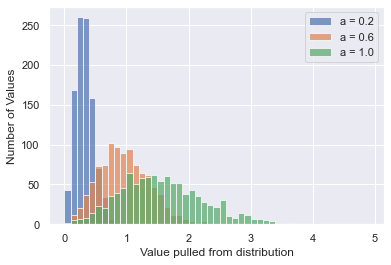

4:80: E501 line too long (143 > 79 characters)
4:94: E231 missing whitespace after ','
4:96: E231 missing whitespace after ','


In [4]:
randState = np.random.RandomState(420666)
fig, ax = plt.subplots()

for a in [0.2, 0.6, 1.0]:
    ax.hist(stats.chi.rvs(df=3, scale=a, size=1000, random_state=randState), bins=np.arange(0,5,0.1), alpha=0.7, label=f"a = {np.around(a,1)}")

plt.legend()

ax.set_xlabel("Value pulled from distribution")
ax.set_ylabel("Number of Values")

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

 **$a \propto \sqrt{T}$** because as T goes up, the distribution of speeds inside a gas increases in both mean and variance


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [24]:
fig, ax = plt.subplots()


def chi_mean(in_df, in_scale):
    return in_scale * np.sqrt(2) * sp.special.gamma((in_df + 1)/2)/sp.special.gamma(in_df/2)


for a in [0.2, 0.6, 1.0]:
    dist_sample = stats.chi.rvs(df=3, scale=a, size=1000, random_state=randState)
    rv = ax.hist(dist_sample, bins=np.arange(0,5,0.1));

    most_pro = -999999
    pro_bin = None
    for bar in rv[2]:
        cen = bar.get_xy()
        wid = bar.get_width()
        hei = bar.get_height()
        if hei > most_pro:
            pro_bin = [cen[0] - wid/2, cen[0] + wid/2]
            most_pro = hei
    
    samp_mean = dist_sample.mean()
    latexPrint( 
        f"The mean of a Chi Distribution with 3 degrees of freedom and a scale of {a}"
        f" is {np.around(chi_mean(3, a), 3)}; the mean of a sample of size 1000 generated"
        f" is {np.around(samp_mean,3)}; the most probable speeds are {tuple(np.around(x, 2) for x in pro_bin)}"
    )

plt.clf();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<Figure size 432x288 with 0 Axes>

5:80: E501 line too long (92 > 79 characters)
9:80: E501 line too long (81 > 79 characters)
10:47: E231 missing whitespace after ','
10:49: E231 missing whitespace after ','
10:55: E703 statement ends with a semicolon
21:1: W293 blank line contains whitespace
23:16: W291 trailing whitespace
24:80: E501 line too long (86 > 79 characters)
25:80: E501 line too long (90 > 79 characters)
26:80: E501 line too long (111 > 79 characters)
29:10: E703 statement ends with a semicolon


This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [7]:
# your code here